In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import warnings
warnings.filterwarnings('ignore')


j'ai charger les fichier csv

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_home_team = pd.read_csv("X_Train_Data/train_home_team_statistics_df.csv")
train_away_team = pd.read_csv("X_Train_Data/train_away_team_statistics_df.csv")
train_home_player = pd.read_csv("X_Train_Data/train_home_player_statistics_df.csv")
train_away_player = pd.read_csv("X_Train_Data/train_away_player_statistics_df.csv")

# Importer les résultats des matchs
y_train = pd.read_csv("Y_train_1rknArQ.csv")

y_train_supp = pd.read_csv("benchmark_and_extras/Y_train_supp.csv")




Pour comprendre les donnes

In [3]:
print("Home Team Data")
train_home_team.head()



Home Team Data


,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [4]:
train_home_team.shape


(12303, 143)

In [5]:
train_home_team.columns

Index(['ID', 'LEAGUE', 'TEAM_NAME', 'TEAM_SHOTS_TOTAL_season_sum',
       'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_season_sum',
       'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_season_sum',
       'TEAM_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=143)

In [6]:
train_home_team.describe()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match_std,TEAM_SUCCESS

In [7]:
print("\nAway Team Data")
train_away_team.head()



Away Team Data


,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [8]:
train_away_team.shape

(12303, 143)

In [9]:
train_away_team.columns

Index(['ID', 'LEAGUE', 'TEAM_NAME', 'TEAM_SHOTS_TOTAL_season_sum',
       'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_season_sum',
       'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_season_sum',
       'TEAM_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=143)

In [10]:
train_away_team.describe()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match_std,TEAM_SUCCESS

In [11]:
print("\n player Data")
train_away_player.head()



 player Data


,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,PLAYER_DISPOSSESSED_season_sum,PLAYER_DRIBBLED_ATTEMPTS_season_sum,PLAYER_DRIBBLED_PAST_season_sum,PLAYER_DUELS_LOST_season_sum,PLAYER_DUELS_WON_season_sum,PLAYER_ERROR_LEAD_TO_GOAL_season_sum,PLAYER_FOULS_season_sum,PLAYER_FOULS_DRAWN_season_sum,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum,PLAYER_GOALS_season_sum,PLAYER_GOALS_CONCEDED_season_sum,PLAYER_HIT_WOODWORK_season_sum,PLAYER_INTERCEPTIONS_season_sum,PLAYER_KEY_PASSES_season_sum,PLAYER_MINUTES_PLAYED_season_sum,PLAYER_OFFSIDES_season_sum,PLAYER_OWN_GOALS_season_sum,PLAYER_PASSES_season_sum,PLAYER_PENALTIES_COMMITTED_season_sum,PLAYER_PENALTIES_MISSES_season_sum,PLAYER_PENALTIES_SAVED_season_sum,PLAYER_PENALTIES_SCORED_season_sum,PLAYER_PENALTIES_WON_season_sum,PLAYER_REDCARDS_season_sum,PLAYER_SAVES_season_sum,PLAYER_SAVES_INSIDE_BOX_season_sum,PLAYER_SHOTS_BLOCKED_season_sum,PLAYER_SHOTS_ON_TARGET_season_sum,PLAYER_SHOTS_TOTAL_season_sum,PLAYER_STARTING_LINEUP_season_sum,PLAYER_SUCCESSFUL_DRIBBLES_season_sum,PLAYER_TACKLES_season_sum,PLAYER_TOTAL_CROSSES_season_sum,PLAYER_TOTAL_DUELS_season_sum,PLAYER_YELLOWCARDS_season_sum,PLAYER_PUNCHES_season_sum,PLAYER_LONG_BALLS_season_sum,PLAYER_LONG_BALLS_WON_season_sum,PLAYER_SHOTS_OFF_TARGET_season_sum,PLAYER_ACCURATE_CROSSES_season_average,PLAYER_ACCURATE_PASSES_season_average,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average,PLAYER_AERIALS_WON_season_average,PLAYER_ASSISTS_season_average,PLAYER_BIG_CHANCES_CREATED_season_average,PLAYER_BIG_CHANCES_MISSED_season_average,PLAYER_BLOCKED_SHOTS_season_average,PLAYER_CAPTAIN_season_average,PLAYER_CLEARANCES_season_average,PLAYER_CLEARANCE_OFFLINE_season_average,PLAYER_DISPOSSESSED_season_average,PLAYER_DRIBBLED_ATTEMPTS_season_average,PLAYER_DRIBBLED_PAST_season_average,PLAYER_DUELS_LOST_season_average,PLAYER_DUELS_WON_season_average,PLAYER_ERROR_LEAD_TO_GOAL_season_average,PLAYER_FOULS_season_average,PLAYER_FOULS_DRAWN_season_average,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average,PLAYER_GOALS_season_average,PLAYER_GOALS_CONCEDED_season_average,PLAYER_HIT_WOODWORK_season_average,PLAYER_INTERCEPTIONS_season_average,PLAYER_KEY_PASSES_season_average,PLAYER_MINUTES_PLAYED_season_average,PLAYER_OFFSIDES_season_average,PLAYER_OWN_GOALS_season_average,PLAYER_PASSES_season_average,PLAYER_PENALTIES_COMMITTED_season_average,PLAYER_PENALTIES_MISSES_season_average,PLAYER_PENALTIES_SAVED_season_average,PLAYER_PENALTIES_SCORED_season_average,PLAYER_PENALTIES_WON_season_average,PLAYER_RATING_season_average,PLAYER_REDCARDS_season_average,PLAYER_SAVES_season_average,PLAYER_SAVES_INSIDE_BOX_season_average,PLAYER_SHOTS_BLOCKED_season_average,PLAYER_SHOTS_ON_TARGET_season_average,PLAYER_SHOTS_TOTAL_season_average,PLAYER_STARTING_LINEUP_season_average,PLAYER_SUCCESSFUL_DRIBBLES_season_average,PLAYER_TACKLES_season_average,PLAYER_TOTAL_CROSSES_season_average,PLAYER_TOTAL_DUELS_season_average,PLAYER_YELLOWCARDS_season_average,PLAYER_PUNCHES_season_average,PLAYER_LONG_BALLS_season_average,PLAYER_LONG_BALLS_WON_season_average,PLAYER_SHOTS_OFF_TARGET_season_average,PLAYER_ACCURATE_CROSSES_season_std,PLAYER_ACCURATE_PASSES_season_std,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std,PLAYER_AERIALS_WON_season_std,PLAYER_ASSISTS_season_std,PLAYER_BIG_CHANCES_CREATED_season_std,PLAYER_BIG_CHANCES_MISSED_season_std,PLAYER_BLOCKED_SHOTS_season_std,PLAYER_CAPTAIN_season_std,PLAYER_CLEARANCES_season_std,PLAYER_CLEARANCE_OFFLINE_season_std,PLAYER_DISPOSSESSED_season_std,PLAYER_DRIBBLED_ATTEMPTS_season_std,PLAYER_DRIBBLED_PAST_season_std,PLAYER_DUELS_LOST_season_std,PLAYER_DUELS_WON_season_std,PLAYER_ERROR_LEAD_TO_GOAL_season_std,PLAYER_FOULS_season_std,PLAYER_FO

In [12]:
train_away_player.shape

(236132, 307)

In [13]:
train_away_player.columns

Index(['ID', 'LEAGUE', 'TEAM_NAME', 'POSITION', 'PLAYER_NAME',
       'PLAYER_ACCURATE_CROSSES_season_sum',
       'PLAYER_ACCURATE_PASSES_season_sum', 'PLAYER_AERIALS_WON_season_sum',
       'PLAYER_ASSISTS_season_sum', 'PLAYER_BIG_CHANCES_CREATED_season_sum',
       ...
       'PLAYER_STARTING_LINEUP_5_last_match_std',
       'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std',
       'PLAYER_TACKLES_5_last_match_std',
       'PLAYER_TOTAL_CROSSES_5_last_match_std',
       'PLAYER_TOTAL_DUELS_5_last_match_std',
       'PLAYER_YELLOWCARDS_5_last_match_std',
       'PLAYER_PUNCHES_5_last_match_std', 'PLAYER_LONG_BALLS_5_last_match_std',
       'PLAYER_LONG_BALLS_WON_5_last_match_std',
       'PLAYER_SHOTS_OFF_TARGET_5_last_match_std'],
      dtype='object', length=307)

In [14]:
train_home_player.head()

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,PLAYER_DISPOSSESSED_season_sum,PLAYER_DRIBBLED_ATTEMPTS_season_sum,PLAYER_DRIBBLED_PAST_season_sum,PLAYER_DUELS_LOST_season_sum,PLAYER_DUELS_WON_season_sum,PLAYER_ERROR_LEAD_TO_GOAL_season_sum,PLAYER_FOULS_season_sum,PLAYER_FOULS_DRAWN_season_sum,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum,PLAYER_GOALS_season_sum,PLAYER_GOALS_CONCEDED_season_sum,PLAYER_HIT_WOODWORK_season_sum,PLAYER_INTERCEPTIONS_season_sum,PLAYER_KEY_PASSES_season_sum,PLAYER_MINUTES_PLAYED_season_sum,PLAYER_OFFSIDES_season_sum,PLAYER_OWN_GOALS_season_sum,PLAYER_PASSES_season_sum,PLAYER_PENALTIES_COMMITTED_season_sum,PLAYER_PENALTIES_MISSES_season_sum,PLAYER_PENALTIES_SAVED_season_sum,PLAYER_PENALTIES_SCORED_season_sum,PLAYER_PENALTIES_WON_season_sum,PLAYER_REDCARDS_season_sum,PLAYER_SAVES_season_sum,PLAYER_SAVES_INSIDE_BOX_season_sum,PLAYER_SHOTS_BLOCKED_season_sum,PLAYER_SHOTS_ON_TARGET_season_sum,PLAYER_SHOTS_TOTAL_season_sum,PLAYER_STARTING_LINEUP_season_sum,PLAYER_SUCCESSFUL_DRIBBLES_season_sum,PLAYER_TACKLES_season_sum,PLAYER_TOTAL_CROSSES_season_sum,PLAYER_TOTAL_DUELS_season_sum,PLAYER_YELLOWCARDS_season_sum,PLAYER_PUNCHES_season_sum,PLAYER_LONG_BALLS_season_sum,PLAYER_LONG_BALLS_WON_season_sum,PLAYER_SHOTS_OFF_TARGET_season_sum,PLAYER_ACCURATE_CROSSES_season_average,PLAYER_ACCURATE_PASSES_season_average,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average,PLAYER_AERIALS_WON_season_average,PLAYER_ASSISTS_season_average,PLAYER_BIG_CHANCES_CREATED_season_average,PLAYER_BIG_CHANCES_MISSED_season_average,PLAYER_BLOCKED_SHOTS_season_average,PLAYER_CAPTAIN_season_average,PLAYER_CLEARANCES_season_average,PLAYER_CLEARANCE_OFFLINE_season_average,PLAYER_DISPOSSESSED_season_average,PLAYER_DRIBBLED_ATTEMPTS_season_average,PLAYER_DRIBBLED_PAST_season_average,PLAYER_DUELS_LOST_season_average,PLAYER_DUELS_WON_season_average,PLAYER_ERROR_LEAD_TO_GOAL_season_average,PLAYER_FOULS_season_average,PLAYER_FOULS_DRAWN_season_average,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average,PLAYER_GOALS_season_average,PLAYER_GOALS_CONCEDED_season_average,PLAYER_HIT_WOODWORK_season_average,PLAYER_INTERCEPTIONS_season_average,PLAYER_KEY_PASSES_season_average,PLAYER_MINUTES_PLAYED_season_average,PLAYER_OFFSIDES_season_average,PLAYER_OWN_GOALS_season_average,PLAYER_PASSES_season_average,PLAYER_PENALTIES_COMMITTED_season_average,PLAYER_PENALTIES_MISSES_season_average,PLAYER_PENALTIES_SAVED_season_average,PLAYER_PENALTIES_SCORED_season_average,PLAYER_PENALTIES_WON_season_average,PLAYER_RATING_season_average,PLAYER_REDCARDS_season_average,PLAYER_SAVES_season_average,PLAYER_SAVES_INSIDE_BOX_season_average,PLAYER_SHOTS_BLOCKED_season_average,PLAYER_SHOTS_ON_TARGET_season_average,PLAYER_SHOTS_TOTAL_season_average,PLAYER_STARTING_LINEUP_season_average,PLAYER_SUCCESSFUL_DRIBBLES_season_average,PLAYER_TACKLES_season_average,PLAYER_TOTAL_CROSSES_season_average,PLAYER_TOTAL_DUELS_season_average,PLAYER_YELLOWCARDS_season_average,PLAYER_PUNCHES_season_average,PLAYER_LONG_BALLS_season_average,PLAYER_LONG_BALLS_WON_season_average,PLAYER_SHOTS_OFF_TARGET_season_average,PLAYER_ACCURATE_CROSSES_season_std,PLAYER_ACCURATE_PASSES_season_std,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std,PLAYER_AERIALS_WON_season_std,PLAYER_ASSISTS_season_std,PLAYER_BIG_CHANCES_CREATED_season_std,PLAYER_BIG_CHANCES_MISSED_season_std,PLAYER_BLOCKED_SHOTS_season_std,PLAYER_CAPTAIN_season_std,PLAYER_CLEARANCES_season_std,PLAYER_CLEARANCE_OFFLINE_season_std,PLAYER_DISPOSSESSED_season_std,PLAYER_DRIBBLED_ATTEMPTS_season_std,PLAYER_DRIBBLED_PAST_season_std,PLAYER_DUELS_LOST_season_std,PLAYER_DUELS_WON_season_std,PLAYER_ERROR_LEAD_TO_GOAL_season_std,PLAYER_FOULS_season_std,PLAYER_FO

In [15]:
train_home_player.shape

(237079, 307)

In [16]:
train_home_player.columns

Index(['ID', 'LEAGUE', 'TEAM_NAME', 'POSITION', 'PLAYER_NAME',
       'PLAYER_ACCURATE_CROSSES_season_sum',
       'PLAYER_ACCURATE_PASSES_season_sum', 'PLAYER_AERIALS_WON_season_sum',
       'PLAYER_ASSISTS_season_sum', 'PLAYER_BIG_CHANCES_CREATED_season_sum',
       ...
       'PLAYER_STARTING_LINEUP_5_last_match_std',
       'PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std',
       'PLAYER_TACKLES_5_last_match_std',
       'PLAYER_TOTAL_CROSSES_5_last_match_std',
       'PLAYER_TOTAL_DUELS_5_last_match_std',
       'PLAYER_YELLOWCARDS_5_last_match_std',
       'PLAYER_PUNCHES_5_last_match_std', 'PLAYER_LONG_BALLS_5_last_match_std',
       'PLAYER_LONG_BALLS_WON_5_last_match_std',
       'PLAYER_SHOTS_OFF_TARGET_5_last_match_std'],
      dtype='object', length=307)

In [17]:
print("\nResults Data")
y_train.head()


Results Data


,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [18]:
y_train.shape

(12303, 4)

In [19]:
y_train.columns

Index(['ID', 'HOME_WINS', 'DRAW', 'AWAY_WINS'], dtype='object')

In [20]:
y_train.describe()

,ID,HOME_WINS,DRAW,AWAY_WINS
count,12303.000000,12303.000000,12303.000000,12303.000000
mean,6151.000000,0.435341,0.258961,0.305698
std,3551.714516,0.495822,0.438082,0.460721
min,0.000000,0.000000,0.000000,0.000000
25%,3075.500000,0.000000,0.000000,0.000000
50%,6151.000000,0.000000,0.000000,0.000000
75%,9226.500000,1.000000,1.000000,1.000000
max,12302.000000,1.000000,1.000000,1.000000


In [21]:
print("\ntrain_supp")
y_train_supp.head()


train_supp


,ID,GOAL_DIFF_HOME_AWAY
0,0,-2.0
1,1,0.0
2,2,-1.0
3,3,1.0
4,4,0.0


In [22]:
y_train_supp.columns

Index(['ID', 'GOAL_DIFF_HOME_AWAY'], dtype='object')

In [23]:
y_train_supp.shape

(12303, 2)

In [24]:
y_train_supp.describe()

,ID,GOAL_DIFF_HOME_AWAY
count,12303.000000,12303.000000
mean,6151.000000,0.277981
std,3551.714516,1.744147
min,0.000000,-13.000000
25%,3075.500000,-1.000000
50%,6151.000000,0.000000
75%,9226.500000,1.000000
max,12302.000000,10.000000


je vais tout d'abord fusionner  les  donner des equipes 

In [25]:
# Fusionner les données
fusionner_data = pd.merge(train_home_team, train_away_team, on='ID', suffixes=('_home', '_away'))

In [26]:
fusionner_data = pd.merge(fusionner_data, y_train, on='ID')
fusionner_data = pd.merge(fusionner_data, y_train_supp, on='ID')


In [27]:
fusionner_data.shape


(12303, 289)

In [28]:
fusionner_data.head()

,ID,LEAGUE_home,TEAM_NAME_home,TEAM_SHOTS_TOTAL_season_sum_home,TEAM_SHOTS_INSIDEBOX_season_sum_home,TEAM_SHOTS_OFF_TARGET_season_sum_home,TEAM_SHOTS_ON_TARGET_season_sum_home,TEAM_SHOTS_OUTSIDEBOX_season_sum_home,TEAM_PASSES_season_sum_home,TEAM_SUCCESSFUL_PASSES_season_sum_home,TEAM_SAVES_season_sum_home,TEAM_CORNERS_season_sum_home,TEAM_FOULS_season_sum_home,TEAM_YELLOWCARDS_season_sum_home,TEAM_REDCARDS_season_sum_home,TEAM_OFFSIDES_season_sum_home,TEAM_ATTACKS_season_sum_home,TEAM_PENALTIES_season_sum_home,TEAM_SUBSTITUTIONS_season_sum_home,TEAM_BALL_SAFE_season_sum_home,TEAM_DANGEROUS_ATTACKS_season_sum_home,TEAM_INJURIES_season_sum_home,TEAM_GOALS_season_sum_home,TEAM_GAME_WON_season_sum_home,TEAM_GAME_DRAW_season_sum_home,TEAM_GAME_LOST_season_sum_home,TEAM_SHOTS_TOTAL_season_average_home,TEAM_SHOTS_INSIDEBOX_season_average_home,TEAM_SHOTS_OFF_TARGET_season_average_home,TEAM_SHOTS_ON_TARGET_season_average_home,TEAM_SHOTS_OUTSIDEBOX_season_average_home,TEAM_PASSES_season_average_home,TEAM_SUCCESSFUL_PASSES_season_average_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average_home,TEAM_SAVES_season_average_home,TEAM_CORNERS_season_average_home,TEAM_BALL_POSSESSION_season_average_home,TEAM_FOULS_season_average_home,TEAM_YELLOWCARDS_season_average_home,TEAM_REDCARDS_season_average_home,TEAM_OFFSIDES_season_average_home,TEAM_ATTACKS_season_average_home,TEAM_PENALTIES_season_average_home,TEAM_SUBSTITUTIONS_season_average_home,TEAM_BALL_SAFE_season_average_home,TEAM_DANGEROUS_ATTACKS_season_average_home,TEAM_INJURIES_season_average_home,TEAM_GOALS_season_average_home,TEAM_GAME_WON_season_average_home,TEAM_GAME_DRAW_season_average_home,TEAM_GAME_LOST_season_average_home,TEAM_SHOTS_TOTAL_season_std_home,TEAM_SHOTS_INSIDEBOX_season_std_home,TEAM_SHOTS_OFF_TARGET_season_std_home,TEAM_SHOTS_ON_TARGET_season_std_home,TEAM_SHOTS_OUTSIDEBOX_season_std_home,TEAM_PASSES_season_std_home,TEAM_SUCCESSFUL_PASSES_season_std_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std_home,TEAM_SAVES_season_std_home,TEAM_CORNERS_season_std_home,TEAM_BALL_POSSESSION_season_std_home,TEAM_FOULS_season_std_home,TEAM_YELLOWCARDS_season_std_home,TEAM_REDCARDS_season_std_home,TEAM_OFFSIDES_season_std_home,TEAM_ATTACKS_season_std_home,TEAM_PENALTIES_season_std_home,TEAM_SUBSTITUTIONS_season_std_home,TEAM_BALL_SAFE_season_std_home,TEAM_DANGEROUS_ATTACKS_season_std_home,TEAM_INJURIES_season_std_home,TEAM_GOALS_season_std_home,TEAM_SHOTS_TOTAL_5_last_match_sum_home,TEAM_SHOTS_INSIDEBOX_5_last_match_sum_home,TEAM_SHOTS_OFF_TARGET_5_last_match_sum_home,TEAM_SHOTS_ON_TARGET_5_last_match_sum_home,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum_home,TEAM_PASSES_5_last_match_sum_home,TEAM_SUCCESSFUL_PASSES_5_last_match_sum_home,TEAM_SAVES_5_last_match_sum_home,TEAM_CORNERS_5_last_match_sum_home,TEAM_FOULS_5_last_match_sum_home,TEAM_YELLOWCARDS_5_last_match_sum_home,TEAM_REDCARDS_5_last_match_sum_home,TEAM_OFFSIDES_5_last_match_sum_home,TEAM_ATTACKS_5_last_match_sum_home,TEAM_PENALTIES_5_last_match_sum_home,TEAM_SUBSTITUTIONS_5_last_match_sum_home,TEAM_BALL_SAFE_5_last_match_sum_home,TEAM_DANGEROUS_ATTACKS_5_last_match_sum_home,TEAM_INJURIES_5_last_match_sum_home,TEAM_GOALS_5_last_match_sum_home,TEAM_GAME_WON_5_last_match_sum_home,TEAM_GAME_DRAW_5_last_match_sum_home,TEAM_GAME_LOST_5_last_match_sum_home,TEAM_SHOTS_TOTAL_5_last_match_average_home,TEAM_SHOTS_INSIDEBOX_5_last_match_average_home,TEAM_SHOTS_OFF_TARGET_5_last_match_average_home,TEAM_SHOTS_ON_TARGET_5_last_match_average_home,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average_home,TEAM_PASSES_5_last_match_average_home,TEAM_SUCCESSFUL_PASSES_5_last_match_average_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average_home,TEAM_SAVES_5_last_match_average_home,TEAM_CORNERS_5_last_match_average_home,TEAM_BALL_POSSESSION_5_last_match_average_home,TEAM_FOULS_5_last_match_average_home,TEAM_YELLOWCARDS_5_last_match_average_home,TEAM_REDCARDS_5_last_match_average_home,TEAM_OFFSIDES_5_last_match_average_home,TEAM_ATTACKS_5_last_match_

In [29]:
fusionner_data.columns

Index(['ID', 'LEAGUE_home', 'TEAM_NAME_home',
       'TEAM_SHOTS_TOTAL_season_sum_home',
       'TEAM_SHOTS_INSIDEBOX_season_sum_home',
       'TEAM_SHOTS_OFF_TARGET_season_sum_home',
       'TEAM_SHOTS_ON_TARGET_season_sum_home',
       'TEAM_SHOTS_OUTSIDEBOX_season_sum_home', 'TEAM_PASSES_season_sum_home',
       'TEAM_SUCCESSFUL_PASSES_season_sum_home',
       ...
       'TEAM_PENALTIES_5_last_match_std_away',
       'TEAM_SUBSTITUTIONS_5_last_match_std_away',
       'TEAM_BALL_SAFE_5_last_match_std_away',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std_away',
       'TEAM_INJURIES_5_last_match_std_away',
       'TEAM_GOALS_5_last_match_std_away', 'HOME_WINS', 'DRAW', 'AWAY_WINS',
       'GOAL_DIFF_HOME_AWAY'],
      dtype='object', length=289)

In [30]:
fusionner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Columns: 289 entries, ID to GOAL_DIFF_HOME_AWAY
dtypes: float64(281), int64(4), object(4)
memory usage: 27.1+ MB


In [31]:
fusionner_data.describe()

,ID,TEAM_SHOTS_TOTAL_season_sum_home,TEAM_SHOTS_INSIDEBOX_season_sum_home,TEAM_SHOTS_OFF_TARGET_season_sum_home,TEAM_SHOTS_ON_TARGET_season_sum_home,TEAM_SHOTS_OUTSIDEBOX_season_sum_home,TEAM_PASSES_season_sum_home,TEAM_SUCCESSFUL_PASSES_season_sum_home,TEAM_SAVES_season_sum_home,TEAM_CORNERS_season_sum_home,TEAM_FOULS_season_sum_home,TEAM_YELLOWCARDS_season_sum_home,TEAM_REDCARDS_season_sum_home,TEAM_OFFSIDES_season_sum_home,TEAM_ATTACKS_season_sum_home,TEAM_PENALTIES_season_sum_home,TEAM_SUBSTITUTIONS_season_sum_home,TEAM_BALL_SAFE_season_sum_home,TEAM_DANGEROUS_ATTACKS_season_sum_home,TEAM_INJURIES_season_sum_home,TEAM_GOALS_season_sum_home,TEAM_GAME_WON_season_sum_home,TEAM_GAME_DRAW_season_sum_home,TEAM_GAME_LOST_season_sum_home,TEAM_SHOTS_TOTAL_season_average_home,TEAM_SHOTS_INSIDEBOX_season_average_home,TEAM_SHOTS_OFF_TARGET_season_average_home,TEAM_SHOTS_ON_TARGET_season_average_home,TEAM_SHOTS_OUTSIDEBOX_season_average_home,TEAM_PASSES_season_average_home,TEAM_SUCCESSFUL_PASSES_season_average_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average_home,TEAM_SAVES_season_average_home,TEAM_CORNERS_season_average_home,TEAM_BALL_POSSESSION_season_average_home,TEAM_FOULS_season_average_home,TEAM_YELLOWCARDS_season_average_home,TEAM_REDCARDS_season_average_home,TEAM_OFFSIDES_season_average_home,TEAM_ATTACKS_season_average_home,TEAM_PENALTIES_season_average_home,TEAM_SUBSTITUTIONS_season_average_home,TEAM_BALL_SAFE_season_average_home,TEAM_DANGEROUS_ATTACKS_season_average_home,TEAM_INJURIES_season_average_home,TEAM_GOALS_season_average_home,TEAM_GAME_WON_season_average_home,TEAM_GAME_DRAW_season_average_home,TEAM_GAME_LOST_season_average_home,TEAM_SHOTS_TOTAL_season_std_home,TEAM_SHOTS_INSIDEBOX_season_std_home,TEAM_SHOTS_OFF_TARGET_season_std_home,TEAM_SHOTS_ON_TARGET_season_std_home,TEAM_SHOTS_OUTSIDEBOX_season_std_home,TEAM_PASSES_season_std_home,TEAM_SUCCESSFUL_PASSES_season_std_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std_home,TEAM_SAVES_season_std_home,TEAM_CORNERS_season_std_home,TEAM_BALL_POSSESSION_season_std_home,TEAM_FOULS_season_std_home,TEAM_YELLOWCARDS_season_std_home,TEAM_REDCARDS_season_std_home,TEAM_OFFSIDES_season_std_home,TEAM_ATTACKS_season_std_home,TEAM_PENALTIES_season_std_home,TEAM_SUBSTITUTIONS_season_std_home,TEAM_BALL_SAFE_season_std_home,TEAM_DANGEROUS_ATTACKS_season_std_home,TEAM_INJURIES_season_std_home,TEAM_GOALS_season_std_home,TEAM_SHOTS_TOTAL_5_last_match_sum_home,TEAM_SHOTS_INSIDEBOX_5_last_match_sum_home,TEAM_SHOTS_OFF_TARGET_5_last_match_sum_home,TEAM_SHOTS_ON_TARGET_5_last_match_sum_home,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum_home,TEAM_PASSES_5_last_match_sum_home,TEAM_SUCCESSFUL_PASSES_5_last_match_sum_home,TEAM_SAVES_5_last_match_sum_home,TEAM_CORNERS_5_last_match_sum_home,TEAM_FOULS_5_last_match_sum_home,TEAM_YELLOWCARDS_5_last_match_sum_home,TEAM_REDCARDS_5_last_match_sum_home,TEAM_OFFSIDES_5_last_match_sum_home,TEAM_ATTACKS_5_last_match_sum_home,TEAM_PENALTIES_5_last_match_sum_home,TEAM_SUBSTITUTIONS_5_last_match_sum_home,TEAM_BALL_SAFE_5_last_match_sum_home,TEAM_DANGEROUS_ATTACKS_5_last_match_sum_home,TEAM_INJURIES_5_last_match_sum_home,TEAM_GOALS_5_last_match_sum_home,TEAM_GAME_WON_5_last_match_sum_home,TEAM_GAME_DRAW_5_last_match_sum_home,TEAM_GAME_LOST_5_last_match_sum_home,TEAM_SHOTS_TOTAL_5_last_match_average_home,TEAM_SHOTS_INSIDEBOX_5_last_match_average_home,TEAM_SHOTS_OFF_TARGET_5_last_match_average_home,TEAM_SHOTS_ON_TARGET_5_last_match_average_home,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average_home,TEAM_PASSES_5_last_match_average_home,TEAM_SUCCESSFUL_PASSES_5_last_match_average_home,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average_home,TEAM_SAVES_5_last_match_average_home,TEAM_CORNERS_5_last_match_average_home,TEAM_BALL_POSSESSION_5_last_match_average_home,TEAM_FOULS_5_last_match_average_home,TEAM_YELLOWCARDS_5_last_match_average_home,TEAM_REDCARDS_5_last_match_average_home,TEAM_OFFSIDES_5_last_match_average_home,TEAM_ATTACKS_5_last_match_average_home,TEAM_PENALTIES

In [32]:
# Je sélection des colonnes importantes puisque y a trop de données
colonnes_importantes = [
    'TEAM_SHOTS_TOTAL_season_sum_home',  # Total des tirs dans la saison
    'TEAM_GOALS_season_sum_home',        # Total des buts dans la saison
    'TEAM_BALL_POSSESSION_season_average_home',  # Possession moyenne de balle
    'TEAM_ATTACKS_season_sum_home',      # Total des attaques
    'TEAM_GOALS_5_last_match_sum_home',  # Total des buts dans les 5 derniers matchs
    'TEAM_DANGEROUS_ATTACKS_5_last_match_sum_home',  # Attaques dangereuses récentes
    'TEAM_CORNERS_5_last_match_sum_home',  # Corners dans les 5 derniers matchs
    'TEAM_FOULS_5_last_match_sum_home',    # Fautes dans les 5 derniers matchs
    'TEAM_SUCCESSFUL_PASSES_5_last_match_average_home',  # Passes réussies moyennes
    'TEAM_BALL_SAFE_5_last_match_sum_home'  # Balles sécurisées récentes
]


Je visualise  les relations entre les variables en utilisant Corrélations

In [33]:
data_filtre = fusionner_data[colonnes_importantes].head(50)

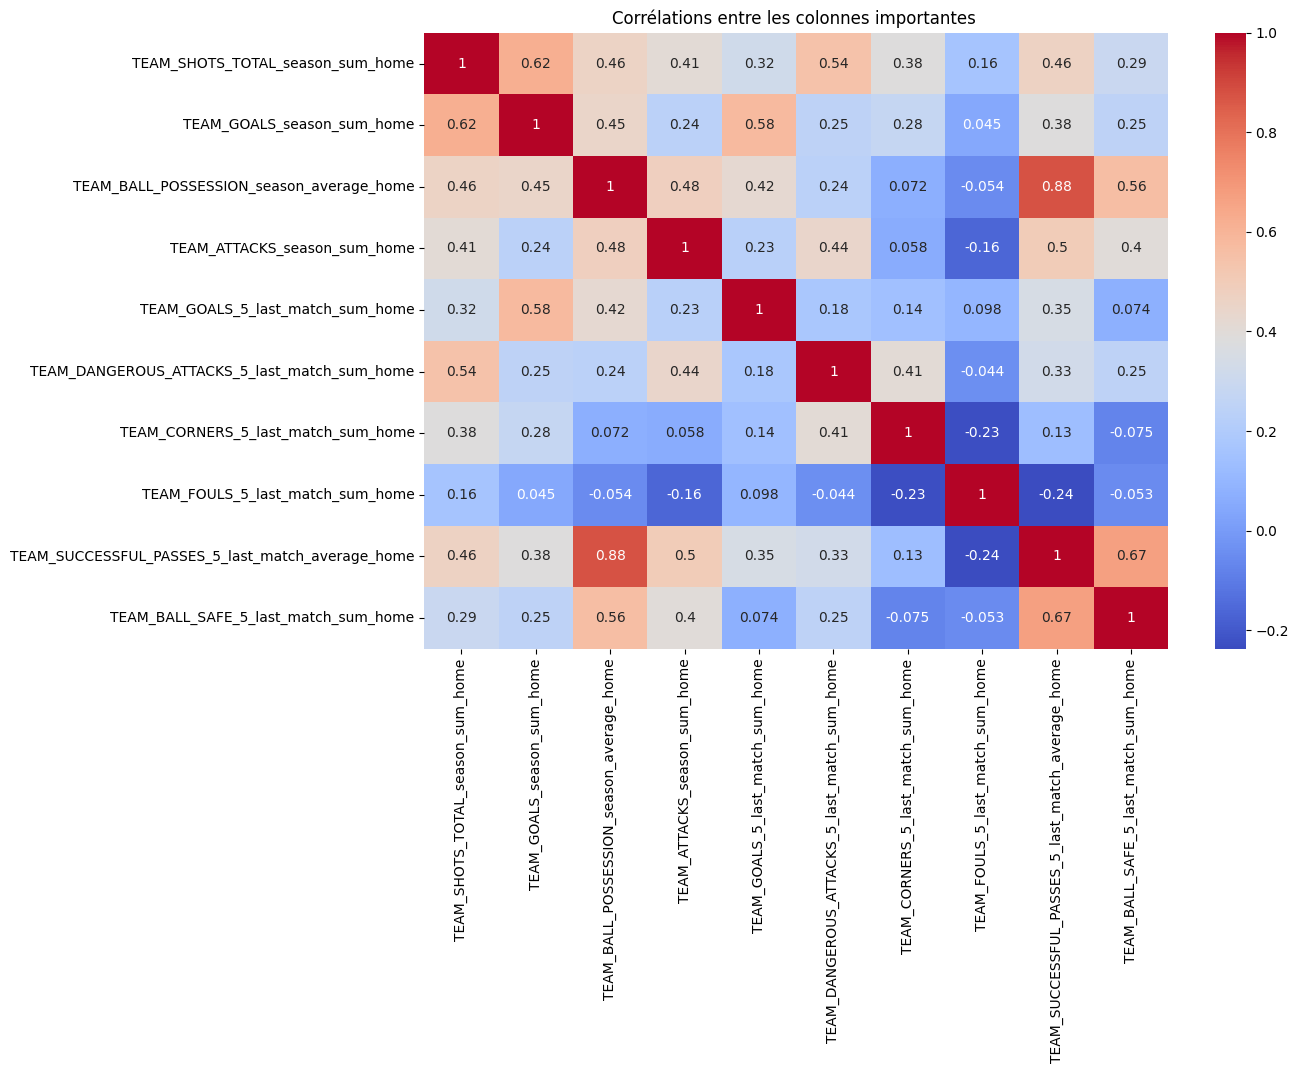

In [34]:
# afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data_filtre.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations entre les colonnes importantes ")
plt.show()

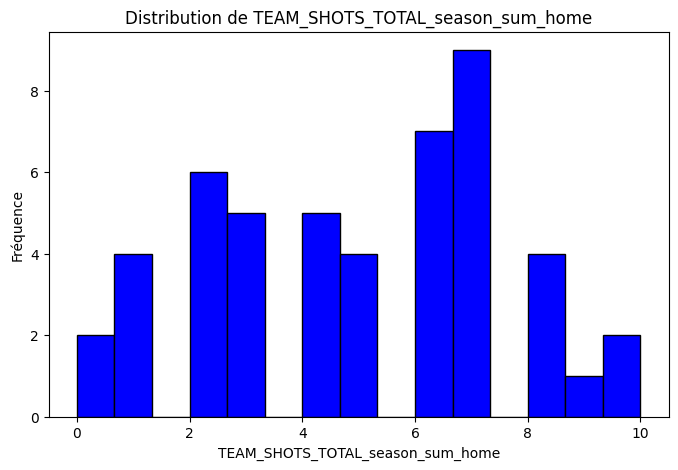

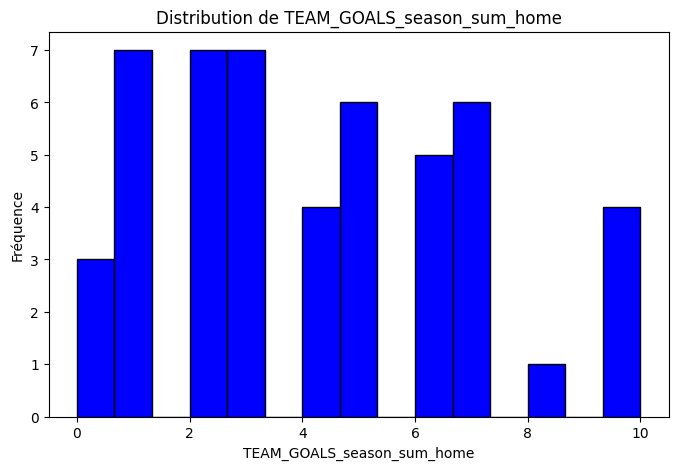

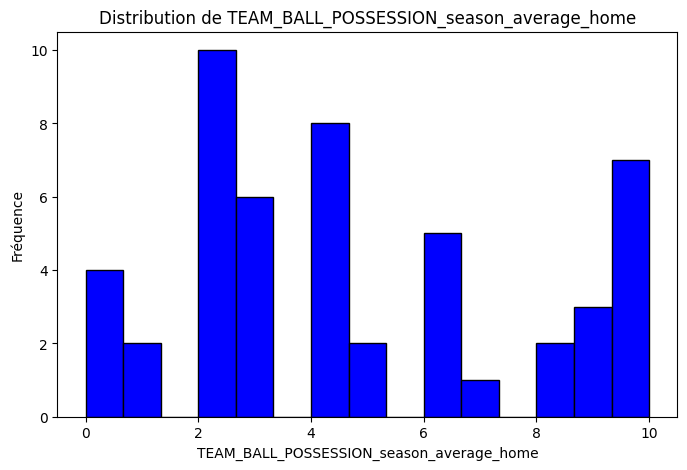

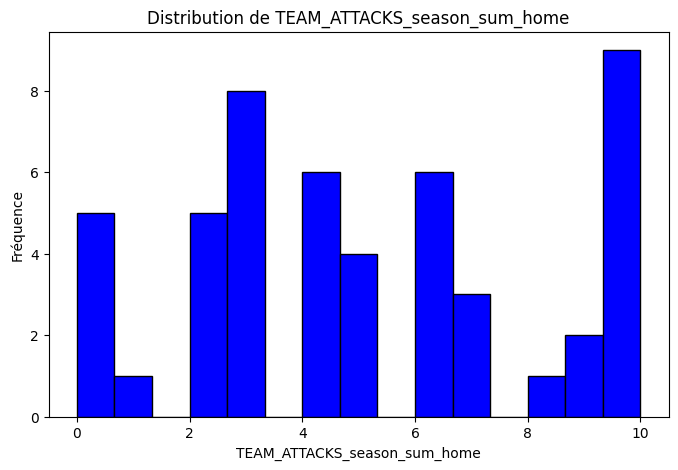

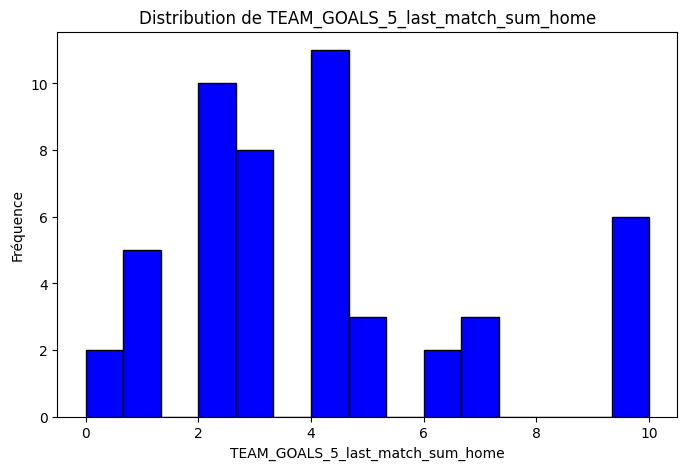

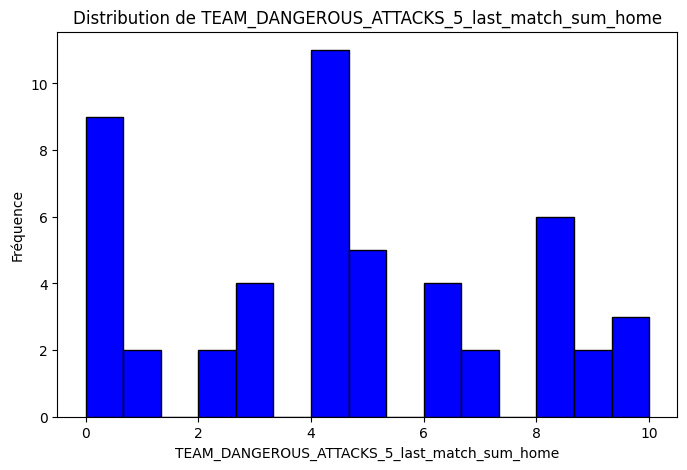

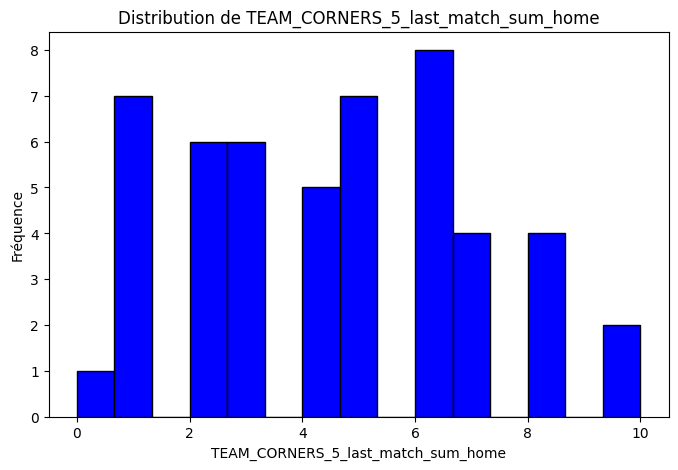

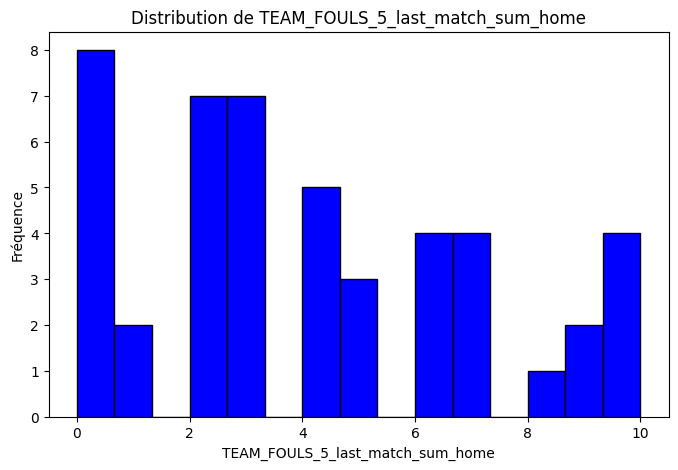

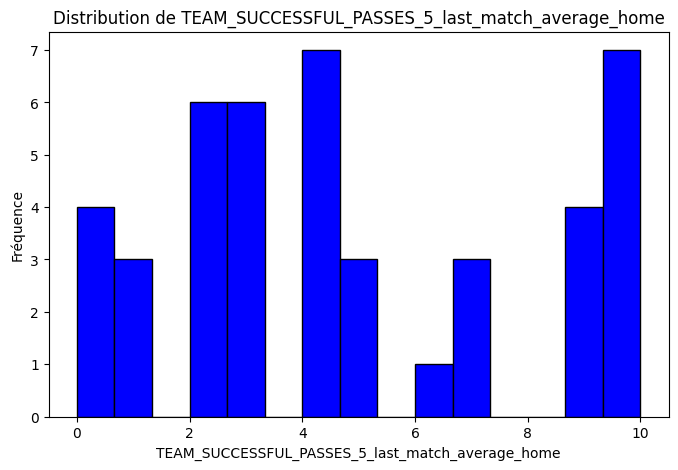

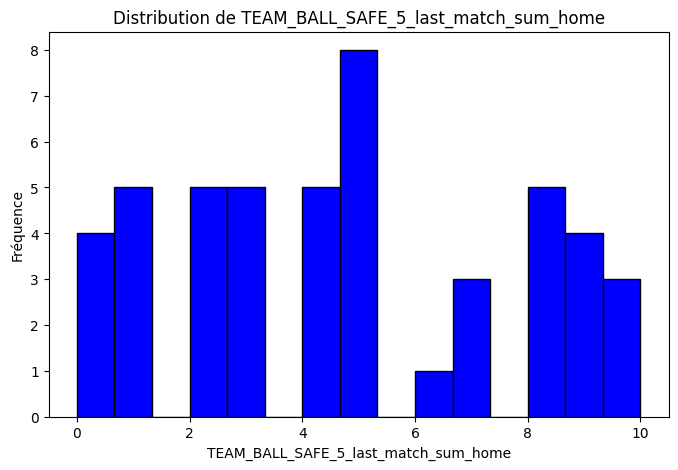

In [35]:
for colonne in colonnes_importantes:
    plt.figure(figsize=(8, 5))
    plt.hist(data_filtre[colonne], bins=15, color='blue', edgecolor='black')
    plt.title(f"Distribution de {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Fréquence")
    plt.show()